In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [9]:
env = gym.make('CartPole-v0')
path_to_recording = './tmp/CartPole-v0-Random-Search'
#env.monitor.start(path_to_recording, force=True)

[2016-12-28 20:17:31,761] Making new env: CartPole-v0


In [10]:
state_space_size = env.observation_space.shape[0]
get_rand_weights = lambda : np.random.random(4)

In [11]:
def run_episode(env, weights):
    state = env.reset()
    total_reward = 0.0
    steps = 0.0
    while True:
        action = 0 if np.sum(state * weights) < 0 else 1
        state_prime, reward, is_done, _ = env.step(action)
        total_reward += reward
        state = state_prime
        steps += 1
        if is_done or steps > 500:
            break
    return total_reward

In [12]:
best_reward = 0.0
best_weights = None
rewards = []
for epoch in xrange(10000):
    weights = get_rand_weights()
    eps_reward = run_episode(env, weights)
    rewards.append(eps_reward)
    if eps_reward > best_reward:
        best_reward = eps_reward
        best_weights = weights
    print epoch, 'reward', eps_reward, 'best reward', best_reward
    
    if eps_reward > 300.0:
        print 'found solution'
        break

print 'testing model'
print 'weights', best_weights

for i in range(200):
    eps_reward = run_episode(env, best_weights)
    rewards.append(eps_reward)
    print i, 'reward', eps_reward

0 reward 10.0 best reward 10.0
1 reward 237.0 best reward 237.0
2 reward 80.0 best reward 237.0
3 reward 28.0 best reward 237.0
4 reward 10.0 best reward 237.0
5 reward 82.0 best reward 237.0
6 reward 11.0 best reward 237.0
7 reward 88.0 best reward 237.0
8 reward 501.0 best reward 501.0
found solution
testing model
weights [ 0.06505159  0.94888554  0.96563203  0.80839735]
0 reward 501.0
1 reward 501.0
2 reward 501.0
3 reward 501.0
4 reward 501.0
5 reward 501.0
6 reward 501.0
7 reward 501.0
8 reward 501.0
9 reward 501.0
10 reward 501.0
11 reward 501.0
12 reward 501.0
13 reward 501.0
14 reward 501.0
15 reward 501.0
16 reward 501.0
17 reward 501.0
18 reward 501.0
19 reward 501.0
20 reward 501.0
21 reward 501.0
22 reward 501.0
23 reward 501.0
24 reward 501.0
25 reward 501.0
26 reward 501.0
27 reward 501.0
28 reward 501.0
29 reward 501.0
30 reward 501.0
31 reward 501.0
32 reward 501.0
33 reward 501.0
34 reward 501.0
35 reward 501.0
36 reward 501.0
37 reward 501.0
38 reward 501.0
39 reward 

In [13]:
def visualize(env, weights):
    state = env.reset()
    while True:
        env.render()
        action = 0 if np.sum(state * weights) < 0 else 1
        state, _, _, _ = env.step(action)

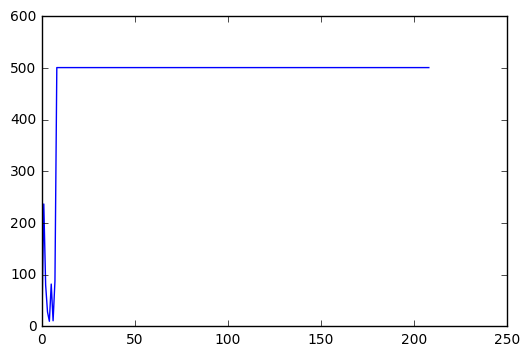

In [14]:
plt.plot(rewards)
plt.show()